In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

titanic_data = pd.read_excel('titanic3.xls')

In [2]:
titanic_data.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


In [3]:
print("# of passengers in Original Data :" + str(len(titanic_data.index)))

# of passengers in Original Data :1309


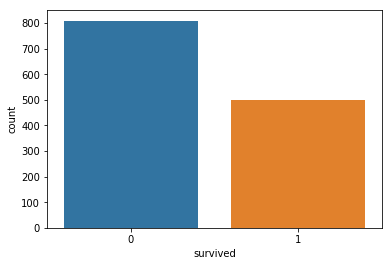

In [4]:
sns.countplot(x= "survived",data =  titanic_data)

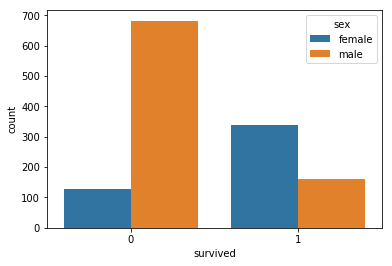

In [5]:
sns.countplot(x= 'survived', hue = 'sex', data= titanic_data)

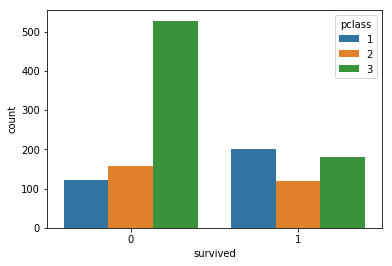

In [6]:
sns.countplot(x='survived', hue = 'pclass', data = titanic_data)

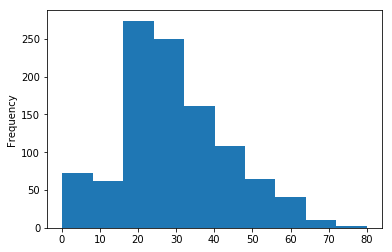

In [7]:
titanic_data['age'].plot.hist()

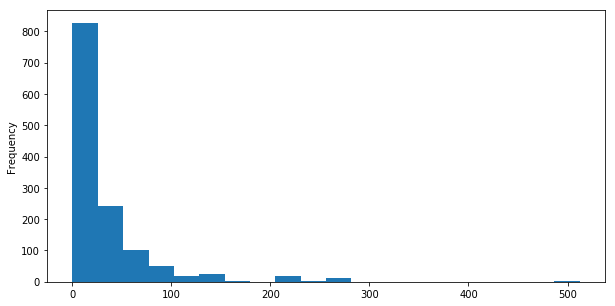

In [8]:
titanic_data['fare'].plot.hist(bins=20,figsize = (10,5))

In [9]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


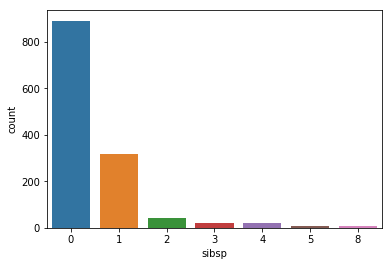

In [10]:
sns.countplot(x='sibsp',data = titanic_data)

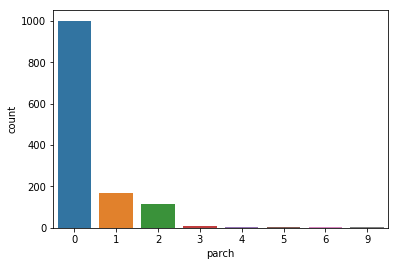

In [11]:
sns.countplot(x='parch',data = titanic_data)

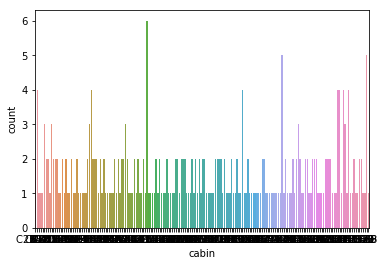

In [12]:
sns.countplot(x='cabin',data = titanic_data)

Data Wrangling


In [13]:
titanic_data.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
5,False,False,False,False,False,False,False,False,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,False,True,True,False
8,False,False,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,True,False,True,False,False


In [14]:
titanic_data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

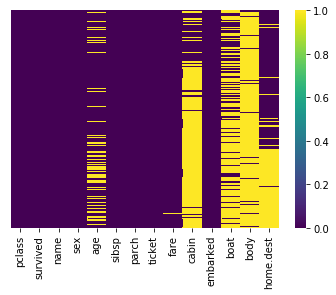

In [15]:
sns.heatmap(titanic_data.isnull(), yticklabels=False,cmap='viridis')

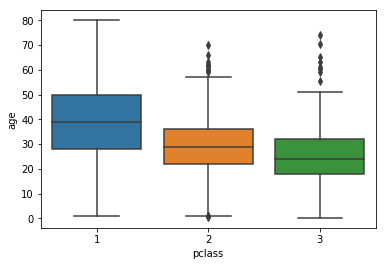

In [16]:
sns.boxplot(x='pclass', y = 'age', data = titanic_data)

In [17]:
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [18]:
titanic_data.drop("cabin",axis=1,inplace=True)

In [19]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [20]:
titanic_data.drop("boat",axis=1,inplace=True)

In [21]:
titanic_data.drop("body",axis=1,inplace=True)

In [22]:
titanic_data.drop("home.dest",axis=1,inplace=True)

In [23]:
titanic_data.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


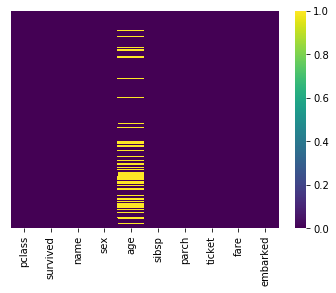

In [24]:
sns.heatmap(titanic_data.isnull(), yticklabels=False,cmap='viridis')

In [25]:
titanic_data.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [26]:
mean = titanic_data['age'].mean()
mean
titanic_data = titanic_data.fillna(mean)

In [27]:
titanic_data.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [28]:
titanic_data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [29]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S


In [30]:
sex = pd.get_dummies(titanic_data['sex'],drop_first=True)
sex.head(5)

,male
0,0
1,1
2,0
3,1
4,0


In [31]:
embark = pd.get_dummies(titanic_data['embarked'],drop_first=True)
embark.head(5)

,C,Q,S
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [32]:
embark = pd.get_dummies(embark,drop_first=True)
embark.head(2)

,C,Q,S
0,0,0,1
1,0,0,1


In [33]:
pcl = pd.get_dummies(titanic_data['pclass'],drop_first=True)
pcl.head(5)

,2,3
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [34]:
titanic_data= pd.concat ([titanic_data,sex,embark,pcl],axis=1)

In [35]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,male,C,Q,S,2,3
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,0,0,0,1,0,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1,0,0,1,0,0
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0,0,0,1,0,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,1,0,0,1,0,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0,0,0,1,0,0


In [36]:
titanic_data.drop(['sex','embarked','ticket','name'],axis=1,inplace=True)

In [37]:
titanic_data.head()

,pclass,survived,age,sibsp,parch,fare,male,C,Q,S,2,3
0,1,1,29.0000,0,0,211.3375,0,0,0,1,0,0
1,1,1,0.9167,1,2,151.5500,1,0,0,1,0,0
2,1,0,2.0000,1,2,151.5500,0,0,0,1,0,0
3,1,0,30.0000,1,2,151.5500,1,0,0,1,0,0
4,1,0,25.0000,1,2,151.5500,0,0,0,1,0,0


In [38]:
titanic_data.drop('pclass',axis=1,inplace=True)

In [39]:
titanic_data.head()

,survived,age,sibsp,parch,fare,male,C,Q,S,2,3
0,1,29.0000,0,0,211.3375,0,0,0,1,0,0
1,1,0.9167,1,2,151.5500,1,0,0,1,0,0
2,0,2.0000,1,2,151.5500,0,0,0,1,0,0
3,0,30.0000,1,2,151.5500,1,0,0,1,0,0
4,0,25.0000,1,2,151.5500,0,0,0,1,0,0


##Train and Test

In [55]:
X=titanic_data.drop('survived',axis=1)
y=titanic_data['survived']

In [41]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=14)

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logmodel = LogisticRegression()

In [70]:
logmodel.fit(X_train,y_train)

C:\Users\uib43221\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
prediction = logmodel.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

In [73]:
classification_report(y_test,prediction)

'              precision    recall  f1-score   support\n\n           0       0.84      0.80      0.82       254\n           1       0.67      0.73      0.70       139\n\n    accuracy                           0.78       393\n   macro avg       0.76      0.76      0.76       393\nweighted avg       0.78      0.78      0.78       393\n'

In [74]:
from sklearn.metrics import confusion_matrix

In [75]:
confusion_matrix(y_test,prediction)

array([[204,  50],
       [ 38, 101]], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test,prediction)*100

77.60814249363868

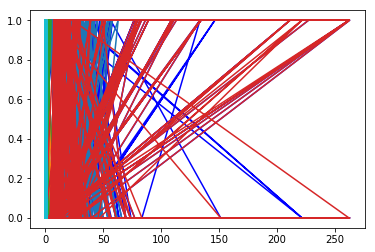

In [78]:
plt.plot(X_test,y_test,color = 'blue')
plt.plot(X_test, logmodel.predict(X_test))